In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

## EDA

"snoring range of the user", "respiration rate", "body temperature", "limb movement rate", "blood oxygen levels", "eye movement", "number of hours of sleep", "heart rate" , "Stress Levels" 

In [2]:
df = pd.read_csv('../datasets/habitat/Habitat_Stress.csv')
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [3]:
df.describe()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


Check for missing values in the dataset


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [5]:
df.isna().sum()

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

Visualize the distribution of the variables using histograms or density plots.

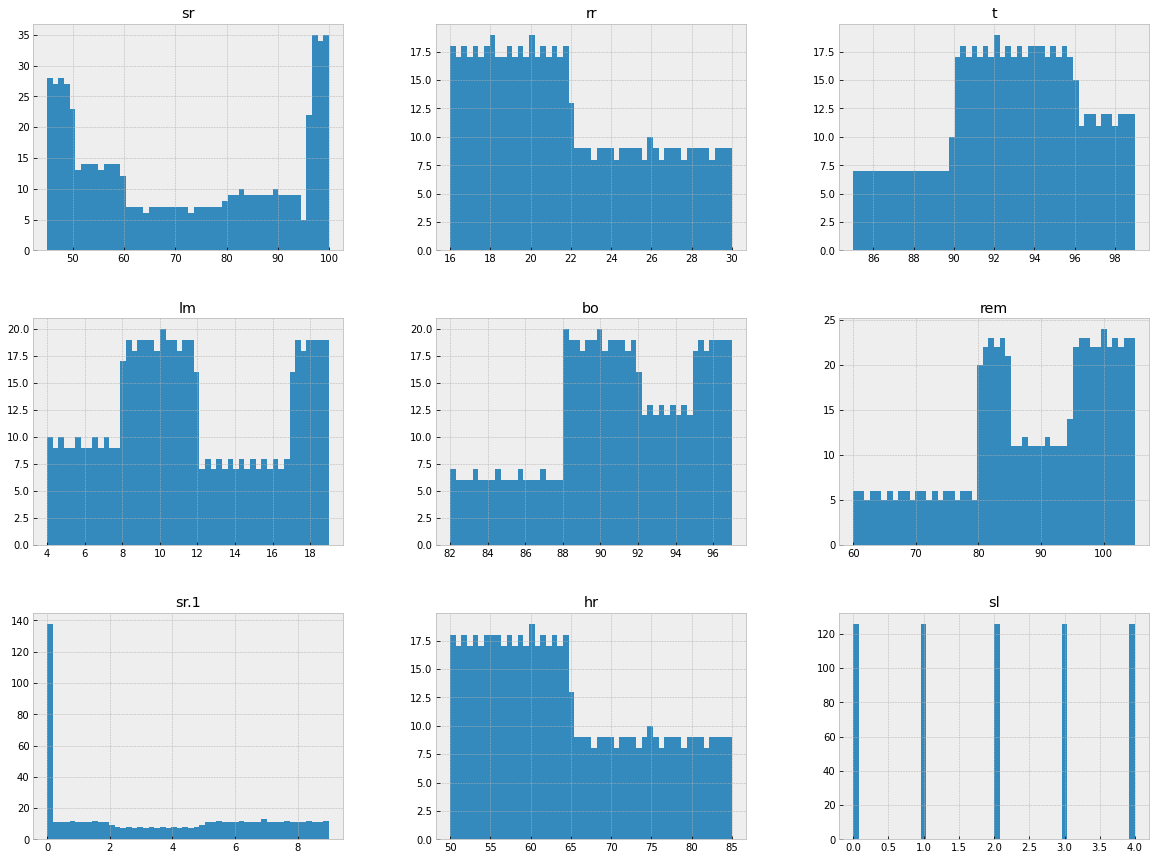

In [6]:
df.hist(bins=50, figsize=(20, 15))

plt.show()

Visualize the relationship between the continuous variables and the categorical target variable using boxplots or violin plots

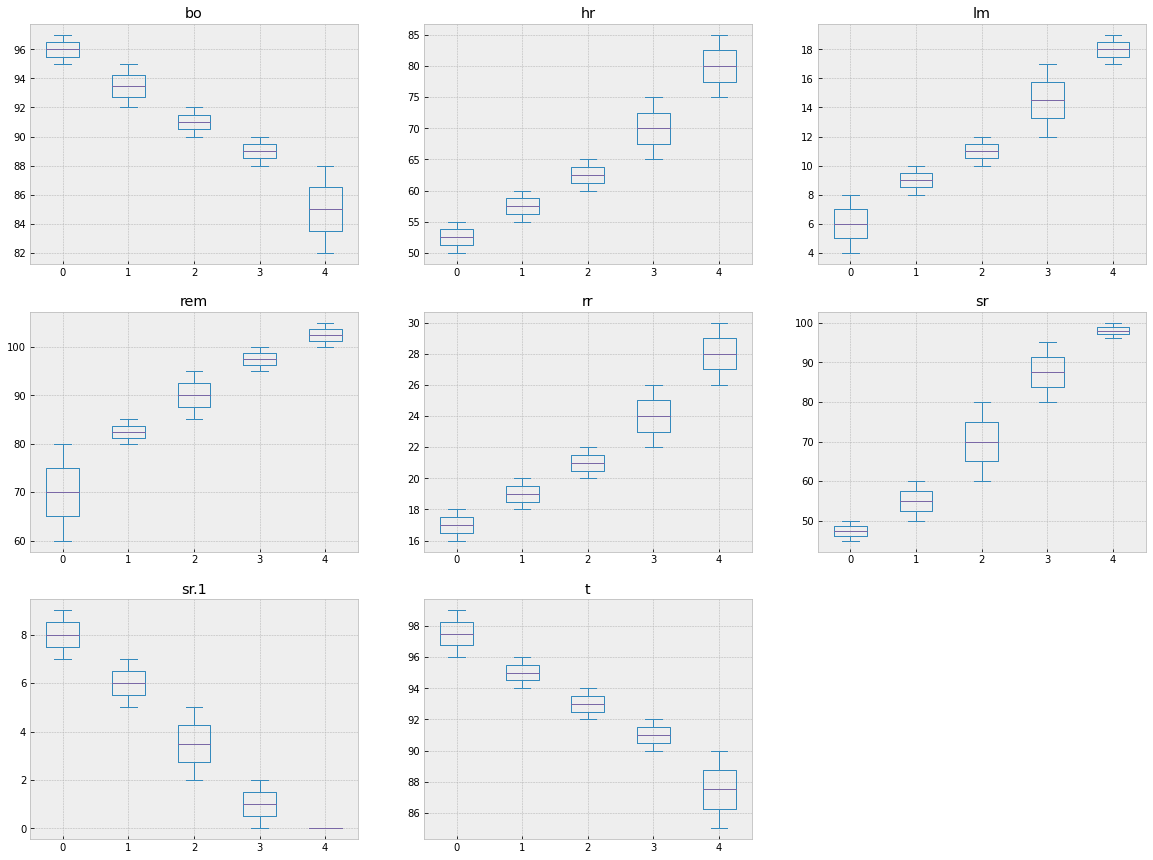

In [7]:
# create boxplots for each continuous variable by target variable
df.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(20, 15), by='sl')
plt.show()

Check for any correlations between the continuous variables using a correlation matrix heatmap.

In [8]:
#sheck correlations of variables to target variable
df.corr()['sl'][:-1]

sr      0.975322
rr      0.963516
t      -0.962354
lm      0.971071
bo     -0.961092
rem     0.951988
sr.1   -0.973036
hr      0.963516
Name: sl, dtype: float64

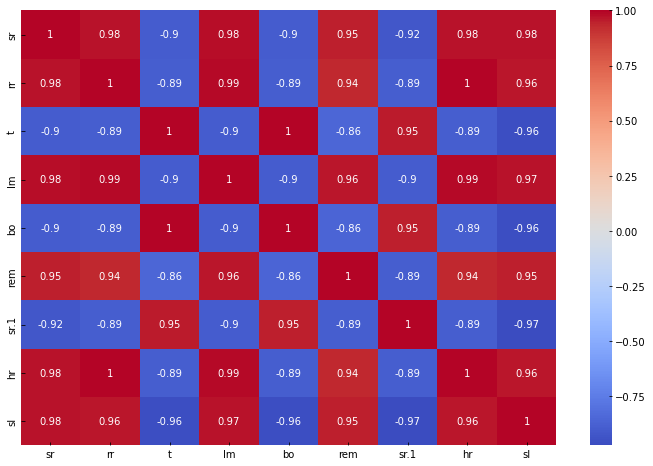

In [9]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

features are all highly correlated

## Model Building

training and testing

In [10]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of random forest:", accuracy_rf)

report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

Accuracy of random forest: 0.9920634920634921
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



#### save the model

In [19]:
import joblib

filename = 'sleep_random_forest_model.joblib'
joblib.dump(rf, filename)

['sleep_random_forest_model.joblib']

#### load model

In [20]:
# load the saved model
loaded_model = joblib.load(filename)

# use the loaded model to make predictions
y_pred_loaded = loaded_model.predict(X_test)

### Logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of logistic regression:", accuracy_lr)

report_lr = classification_report(y_test, y_pred_lr)
print(report_lr)

Accuracy of logistic regression: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



/Users/mattiacintioli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Deep Learning

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# convert NumPy arrays to PyTorch tensors
X_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_tensor = torch.tensor(y_train.values, dtype=torch.long)

# create a PyTorch dataset and dataloader for the training data
train_dataset = TensorDataset(X_tensor, y_tensor)
trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(8, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# create an instance of the neural network
net = Net()

# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# train the neural network
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(trainloader)))

Epoch 1 loss: 2.653
Epoch 2 loss: 1.395
Epoch 3 loss: 1.081
Epoch 4 loss: 0.980
Epoch 5 loss: 0.843
Epoch 6 loss: 0.778
Epoch 7 loss: 0.723
Epoch 8 loss: 0.665
Epoch 9 loss: 0.625
Epoch 10 loss: 0.593
Epoch 11 loss: 0.560
Epoch 12 loss: 0.534
Epoch 13 loss: 0.499
Epoch 14 loss: 0.467
Epoch 15 loss: 0.446
Epoch 16 loss: 0.419
Epoch 17 loss: 0.407
Epoch 18 loss: 0.374
Epoch 19 loss: 0.354
Epoch 20 loss: 0.332
Epoch 21 loss: 0.312
Epoch 22 loss: 0.306
Epoch 23 loss: 0.280
Epoch 24 loss: 0.266
Epoch 25 loss: 0.252
Epoch 26 loss: 0.234
Epoch 27 loss: 0.222
Epoch 28 loss: 0.212
Epoch 29 loss: 0.202
Epoch 30 loss: 0.193
Epoch 31 loss: 0.183
Epoch 32 loss: 0.175
Epoch 33 loss: 0.170
Epoch 34 loss: 0.161
Epoch 35 loss: 0.156
Epoch 36 loss: 0.141
Epoch 37 loss: 0.136
Epoch 38 loss: 0.128
Epoch 39 loss: 0.121
Epoch 40 loss: 0.115
Epoch 41 loss: 0.109
Epoch 42 loss: 0.104
Epoch 43 loss: 0.104
Epoch 44 loss: 0.099
Epoch 45 loss: 0.092
Epoch 46 loss: 0.088
Epoch 47 loss: 0.083
Epoch 48 loss: 0.080
E

In [17]:
from sklearn.metrics import classification_report

# convert NumPy arrays to PyTorch tensors
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# make predictions on the test data
net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)
y_pred = y_pred_tensor.argmax(dim=1).numpy()

# generate a classification report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       1.00      1.00      1.00        24
     class 2       1.00      1.00      1.00        28
     class 3       1.00      1.00      1.00        26
     class 4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

